In [1]:
#Load dataset and necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('kyliehoar/kyliehoar/Auto.csv')

#ABOUT AUTO.CSV
#dataset detailing information on 392 vehicles
#mpg = miles per gallon
#cylinders = number of cylinders between 4 and 8
#displacement = engine displacement (cu. inches)
#horsepower = engine horsepower
#weight = vehicle weight (lbs.)
#acceleration = time to accelerate from 0 to 60 mpg (sec.)
#year = model year (modulo 100)
#origin = origin of car (1. American, 2. European, 3. Japanese)
#name = vehicle name

In [2]:
#Change the mpg column to binary values based on the median
def change_mpg(x):
    if x > df['mpg'].median():
        x = 1
        return x
    if x <= df['mpg'].median():
        x = 0
        return x
        
new_mpg_col = df['mpg'].apply(change_mpg)
df['mpg'] = new_mpg_col

print(df)

     mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0      0          8         307.0        130    3504          12.0    70   
1      0          8         350.0        165    3693          11.5    70   
2      0          8         318.0        150    3436          11.0    70   
3      0          8         304.0        150    3433          12.0    70   
4      0          8         302.0        140    3449          10.5    70   
..   ...        ...           ...        ...     ...           ...   ...   
392    1          4         140.0         86    2790          15.6    82   
393    1          4          97.0         52    2130          24.6    82   
394    1          4         135.0         84    2295          11.6    82   
395    1          4         120.0         79    2625          18.6    82   
396    1          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle malibu  
1    

In [3]:
#Fit support vector classifier w/ linear kernel to predict high (1) or low (0) gas mileage
#Report cross validation error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Replace N/A values in horsepower w/ mean
df['horsepower'] = df['horsepower'].replace('?', pd.NA)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
avg_hp = df['horsepower'].mean(skipna=True)
df['horsepower'].fillna(avg_hp, inplace=True)

#Set X and y values
X = df.drop(columns=['mpg', 'name'])
y = df['mpg']

#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Make SVC model w/linear kernel and fit the data
model = SVC(kernel='linear')
model.fit(X_train, y_train)

#Find cross validation error
cross_val_error = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
print(cross_val_error)

0.9054067460317461


In [4]:
#Fit support vector classifier w/ radial and polynomial kernels to predict high (1) or low (0) gas mileage
#Report cross validation error

#Make SVC model w/radial kernel and fit the data
pmodel = SVC(kernel='poly')
pmodel.fit(X_train, y_train)

#Find cross validation error
cross_val_error = cross_val_score(pmodel, X_train, y_train, cv=5, scoring='accuracy').mean()
print(cross_val_error)

#Make SVC model w/polynomial kernel and fit the data
rmodel = SVC(kernel='rbf')
rmodel.fit(X_train, y_train)

#Find cross validation error
cross_val_error = cross_val_score(rmodel, X_train, y_train, cv=5, scoring='accuracy').mean()
print(cross_val_error)

0.8803075396825395
0.8834821428571427


/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


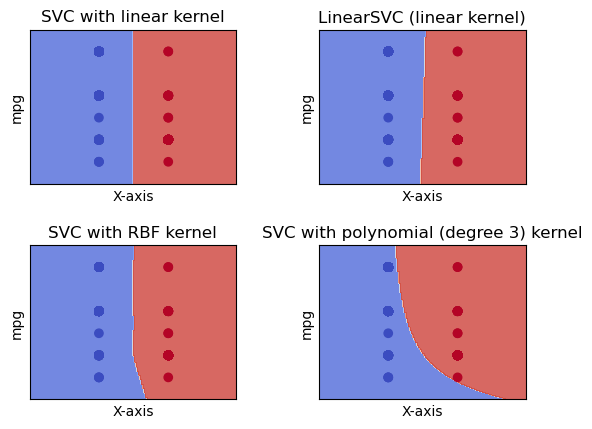

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kyliehoa

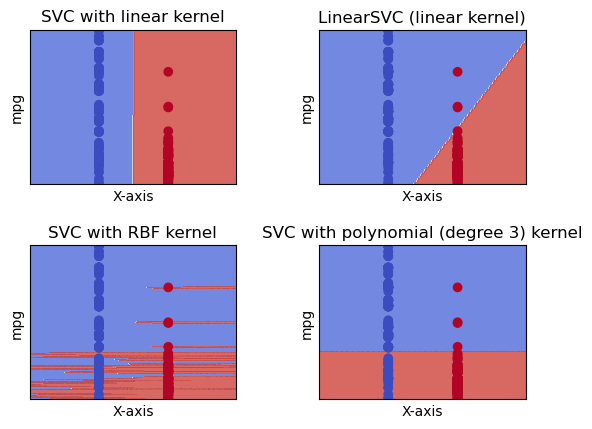

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/kyliehoa

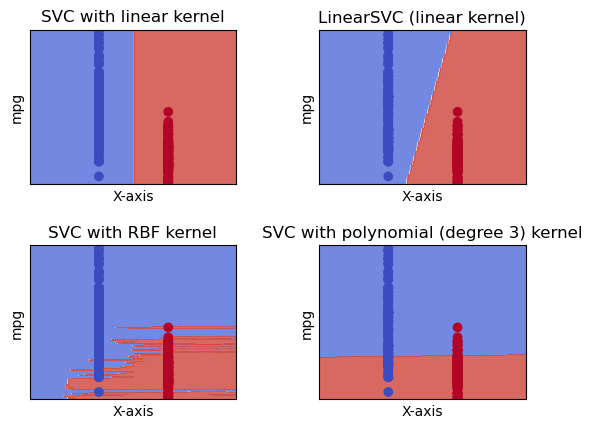

In [5]:
#Make plots to support findings from parts b and c
from sklearn import svm, datasets

def svm_plot(X, y):

    h = .02  # step size in the mesh

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter
    svc = svm.SVC(kernel='linear', C=C).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
    lin_svc = svm.LinearSVC(C=C).fit(X, y)

    # create a mesh to plot in
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # title for the plots
    titles = ['SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel']


    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('X-axis')
        plt.ylabel('mpg')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title(titles[i])

    plt.show()

y_mpg = df['mpg']    
    
X_cyl = df[['mpg','cylinders']]
svm_plot(X_cyl, y_mpg)

X_dis = df[['mpg','displacement']]
svm_plot(X_dis, y_mpg)

X_horse = df[['mpg','horsepower']]
svm_plot(X_horse, y_mpg)

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` 

(397, 7)
(397, 7)
Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')


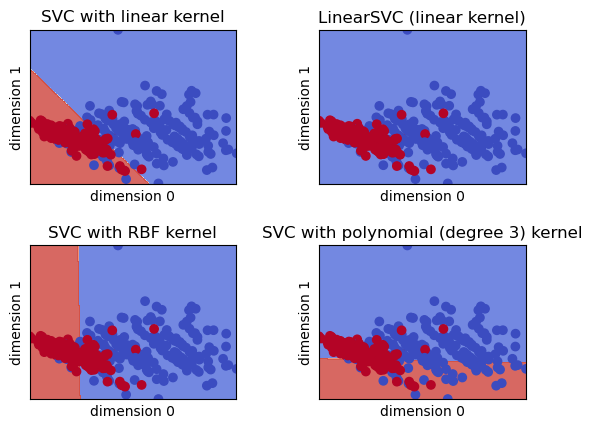

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.decomposition import PCA
# import some data to play with
iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
#y = iris.target

X = df.drop(columns=["name","mpg"])
pca = PCA(n_components=2) #dimention reduction
X_new = pca.fit_transform(X)
# print(pca.singular_values_)

y_true =  df['mpg'].values.reshape(-1,1)
h = .2  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X_new,  y_true)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_new,  y_true)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_new,  y_true)
lin_svc = svm.LinearSVC(C=C).fit(X_new, y)

#svc = svm.SVC(kernel='linear', C=C).fit(X_new, y_true)
#rbf_svc = svm.SVC(kernel='linear', gamma=0.7, C=C).fit(X_new, y_true)#did rbf before
#poly_svc = svm.SVC(kernel='rbf', gamma='scale',degree=3, C=C).fit(X_new, y_true) #changed from 0.7 to scale and not doing poly
#lin_svc = svm.LinearSVC(C=C).fit(X_new, y_true)

# create a mesh to plot in
print(X.shape)
print(X.shape)
print(X.columns)
x_min, x_max = X_new[:, 0].min() - 1, X_new[:, 0].max() + 1
y_min, y_max = X_new[:, 1].min() - 1, X_new[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,( x_max-x_min)/ 390), #was 100
                     np.arange(y_min, y_max, ( y_max-y_min)/ 390))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate([svc,rbf_svc,poly_svc,lin_svc]): #changed
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)


    # Plot also the training points
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_true, cmap=plt.cm.coolwarm)
    plt.xlabel('dimension 0')
    plt.ylabel('dimension 1')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


             State  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18          

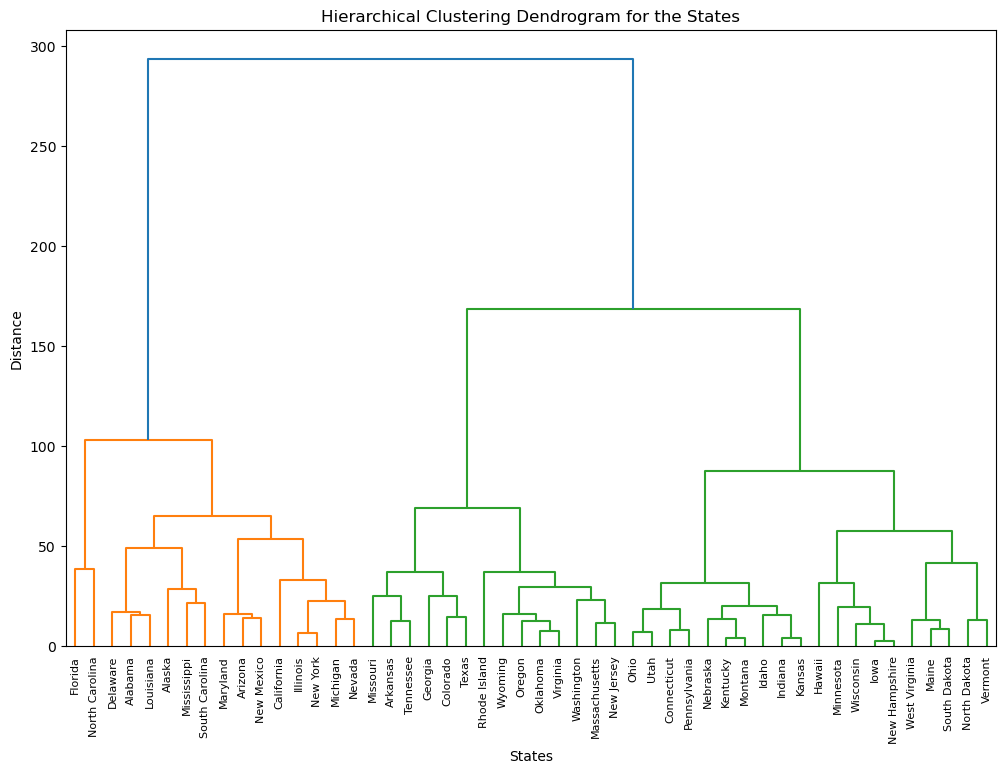

In [7]:
#Use hierarchical clustering to cluster the states in the dataset
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

#Load dataset and change the name of the first column to State
df_arr = pd.read_csv('USArrests.csv')

#ABOUT USArrests.csv
#Statistics, in arrests per 100,000 residents, for assault, murder, and rape in each of the 50 US states in 1973
#Murder = numeric murder arrests (per 100,000)
#Assault = numeric assault arrests (per 100,000)
#UrbanPop = numeric percent urban population (per 100,000)
#Rape = numeric rape arrests (per 100,000)

df_arr.rename(columns={'Unnamed: 0':'State'}, inplace=True)
print(df_arr)

#Set X values
X = df_arr.drop(columns='State')

# Perform hierarchical clustering with complete linkage and Euclidean distance
linkage_matrix = linkage(X, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df_arr['State'].tolist(), leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram for the States')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()

/Users/kyliehoar/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster 0: ['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']


Cluster 1: ['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']


Cluster 2: ['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']


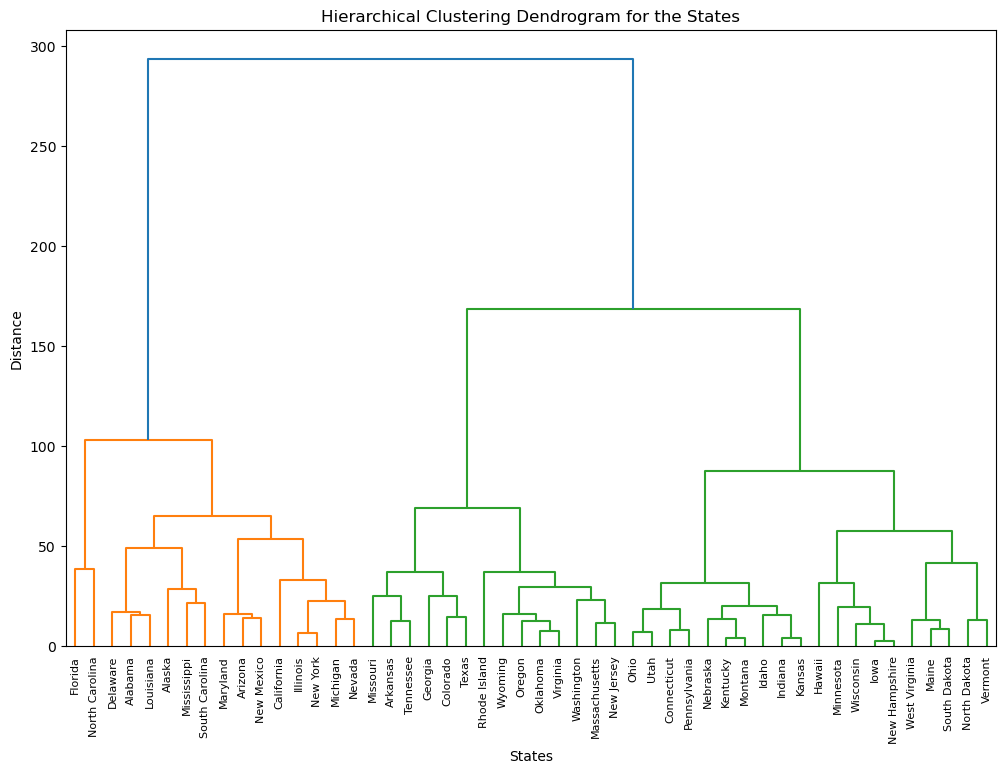

In [8]:
#Cut the dendrogram at a height that results in 3 distinct clusters
#List the states that belong to each cluster
from sklearn.cluster import AgglomerativeClustering

#Cut the dendrogram into clusters and add the column to the set
num_clusters = 3
cluster_labels = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='complete').fit_predict(X)
df_arr["Cluster"] = cluster_labels

#Define clusters
cluster_0 = []
cluster_1 = []
cluster_2 = []
for i, state in enumerate(df_arr['State']):
    if cluster_labels[i] == 0:
        cluster_0.append(state)
    if cluster_labels[i] == 1:
        cluster_1.append(state)
    if cluster_labels[i] == 2:
        cluster_2.append(state)
    
#Print clusters
print("Cluster 0:", cluster_0)
print('\n')
print("Cluster 1:", cluster_1)
print('\n')
print("Cluster 2:", cluster_2)

# Plot the new dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df_arr['State'].tolist(), leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram for the States')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()

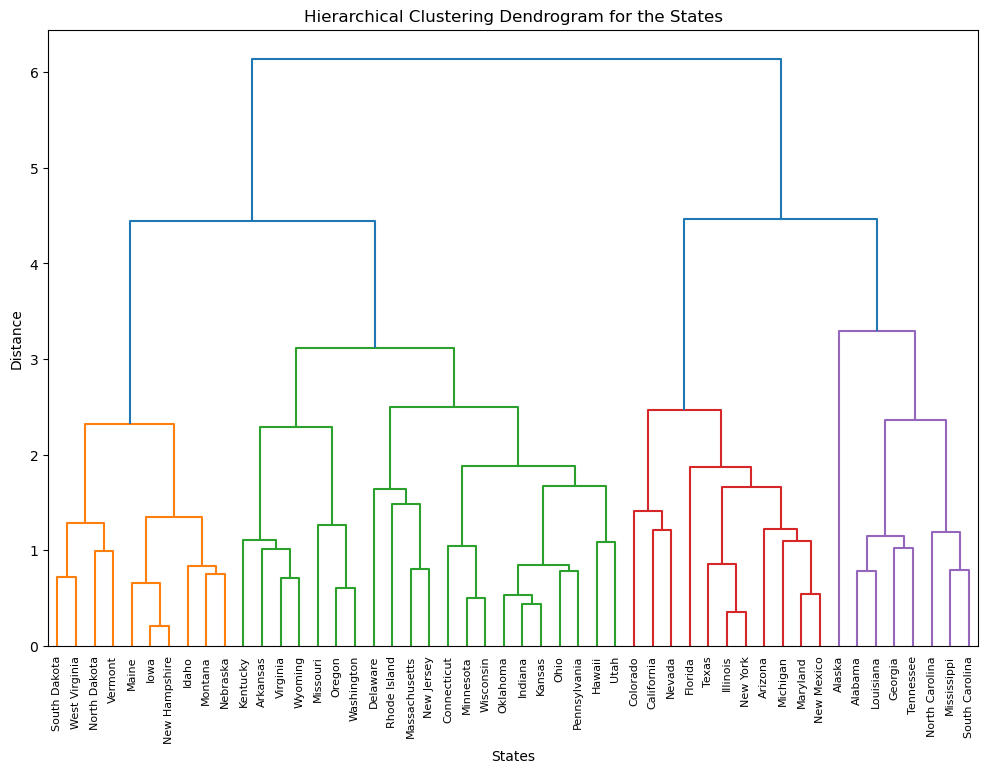

In [9]:
from sklearn.preprocessing import StandardScaler

#Standardize the variables to have standard deviation one
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering with complete linkage and Euclidean distance
linkage_matrix = linkage(X_scaled, method='complete', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df_arr['State'].tolist(), leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram for the States')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()